In [4]:
import PyPDF2 as pypdf
import reportlab
#paper sizes
import reportlab.lib.pagesizes as pagesize
import tempfile
from reportlab.pdfgen import canvas
from reportlab.lib.units import mm
from svglib.svglib import svg2rlg

from reportlab.graphics.shapes import Group
import tempfile
from reportlab.lib.units import mm

In [3]:
from reportlab.graphics import renderPDF

In [15]:
c =canvas.Canvas("Arc.pdf",pagesize=(200,200))
c.setLineWidth(2)
c.setStrokeColorCMYK(1,1,1,1)
p = c.beginPath()
p.arc(0,0,50,200, startAng=0, extent=270)
c.drawPath(p, fill=0, stroke=1)
c.setStrokeColorCMYK(1,0.2,1,0)
c.line(100,100, 200,200)
c.setLineWidth(10)
c.rect(0,0, 200, 200)
#c.line(30, 30, 40, 40)

c.setFill
c.showPage()
c.save()

'n 200 100 m 200 155.2285 155.2285 200 100 200 c 44.77153 200 0 155.2285 0 100 c 0 44.77153 44.77153 0 100 0 c'

In [20]:
regis = svg2rlg('registration.svg')

In [4]:
renderPDF.drawToFile(regis,"black.pdf")

In [2]:
pts_to_mm = 2.8346456693
def pts_mm(size:tuple, mode=True):
    if mode: #pts to mm
        x = round(size[0]/pts_to_mm,2)
        y = round(size[1]/pts_to_mm,2)
        return (x,y)
    else:   #mm to pts
        x = round(size[0] * pts_to_mm, 2)
        y = round(size[1] * pts_to_mm, 2)
        return (x,y)

In [4]:
a4 = (210,297) #mm
print(pts_mm(a4, False))
print((a4[0]*mm,a4[1]*mm))

(595.28, 841.89)
(595.2755905511812, 841.8897637795277)


In [7]:
print(pts_mm((a4[0]*mm,a4[1]*mm)))

(210.0, 297.0)


In [5]:
print(mm)

2.834645669291339


In [3]:
fp = tempfile.TemporaryFile()
can = canvas.Canvas(fp, pagesize=(2*595.27, 2*841.89))

In [5]:
can.lines([((0,100, 100,100)), ((200,100, 400,100))])

In [32]:
can.drawString(100,100," Test Pages")

In [34]:
can.setStrokeColorRGB(0.2,0.5,0.3)
can.setFillColorRGB(1,0,1)
#an draw some lines
can.line(0,0,0,1.7*inch)
can.line(0,0,1*inch,0)
#an draw a rectangle
can.rect(0.2*inch,0.2*inch,1*inch,1.5*inch, fill=1)
#an make text go straight up
can.rotate(90)
#an change color
can.setFillColorRGB(0,0,0.77)
#an say hello (note after rotate the y coord needs to be negative!)
can.drawString(0.3*inch, -inch, "Hello World")

In [35]:
can.save()

In [36]:
twopdf = pypdf.PdfFileReader(fp)

In [37]:
genpdf = pypdf.PdfFileWriter()

In [47]:
inputpage = inputsig.getPage(1)
inputpage.add_transformation(pypdf.Transformation().rotate(90).translate(tx=10))

In [49]:
page = twopdf.getPage(0)
page.merge_page(inputpage)

In [50]:
genpdf.add_page(inputpage)
with open("./test.pdf", "wb") as f:
    genpdf.write(f)

In [ ]:
twopdf = pypdf.PdfFileReader(fp)

In [59]:
inputsig = pypdf.PdfFileReader('1-8.pdf')
inputpage = inputsig.getPage(0)
op = pypdf.Transformation().rotate(0).translate(ty=700, tx=500)
inputpage.addTransformation(op)
pagetwo = twopdf.getPage(0)
pagetwo.merge_page(inputpage)


genpdf = pypdf.PdfFileWriter()
genpdf.add_page(pagetwo)

with open("./copy_1-8.pdf", "wb") as f:
    genpdf.write(f)

In [154]:
import math,io
import PyPDF2 as pypdf
import reportlab
#paper sizes
import reportlab.lib.pagesizes as pagesize
import tempfile
from reportlab.pdfgen import canvas
from reportlab.lib.units import mm
from reportlab.lib.colors import CMYKColor

registration_black = CMYKColor(1,1,1,1)

def convert(hex:str)->tuple:
    if "#" in hex:
        hex= hex.replace("#","")
    R, G, B  = int(hex[0:2],16), int(hex[2:4],16), int(hex[4:6],16)
    
    R = R/255
    G = G/255
    B = B/255

    K = 1- max(R,G,B)
    C = (1-R-K)/(1 - K)
    M = (1-G-K)/(1 - K)
    Y = (1-B-K)/(1 - K)
    return C, M, Y, K

def sig_layout(n:int) -> tuple:
        if type(n) != int or n<4 or n%4 !=0:
            raise ValueError(f"n:{n} must be a positive integer that multiple of 4.")

        if n%3 ==0:
            i = math.log2(n) - math.log2(3) -1
            return(3, int(2**i))
        else:
            i = int(math.log2(n/4))
            if i%2 :
                k = kp = int((i+1)/2)
            else:
                k = int(i/2)
                kp = k+1
            return (int(2**k), int(2**kp))

# e.g: generate_layout((,), (1,4), n=20, d=5, proof=True, proofcode="", trim=True, registration=True, cmyk=True)
def generate_layout(#All dimensions are written in pts unit
        pagesize:tuple, 
        pagenum:int,
        n:tuple, nd:int, d:int, 
        proof:bool, proofcode:str, 
        trim:bool, 
        registration:bool, 
        cmyk:bool
    ):

        #Signature composition
        ni = n[0]
        ns = n[1]

        n_block = int(pagenum/(ni * ns))

        
        #Paper Dimension
        arrange =sig_layout(ns)
        ny = arrange[0]
        nx = arrange[1]
        x = 2*nd + nx*pagesize[0] + (nx-1)*d    
        y = 2*nd + ny*pagesize[1] + (ny-1)*d

        #Signature proof
        if proof:
            proof_height = pagesize[1]/n_block
            proof_width = d
            cmyk_proof = convert(proofcode)
            proof_position = [nd+pagesize[0], nd+ny*pagesize[1] + (ny-1)*d-proof_height]
        #trim
        if trim:
            trim_l = nd*(1/2)
            #horizontal line
            x1 = nd/4
            x2 = nd + nx*pagesize[0] + (nx-1)*d +x1
            y1 = nd + ny*pagesize[1] + (ny-1)*d
            y2 = nd
            #vertical line
            x3 = nd
            x4 = x2 - x1
            y3 = nd/4
            y4 = y1 + y3

            trim_lines = [
                (x1,y1, x1 + trim_l, y1), # h, u l
                (x1,y2, x1 + trim_l, y2), # h, d l
                (x2,y1, x2 + trim_l, y1), # h, u r
                (x2,y2, x2 + trim_l, y2), # h, d r
                (x3,y4, x3, y4 + trim_l), # v, u l
                (x3,y3, x3, y3 + trim_l), # v, d l
                (x4,y4, x4, y4 + trim_l), # v, u r
                (x4,y3, x4, y3 + trim_l)  # v, d r
            ]
        if registration:
            l = (4/5) * nd
            dis = nd/2

            if not trim:
                #horizontal line
                x1 = nd/4
                x2 = nd + nx*pagesize[0] + (nx-1)*d +x1
                y1 = nd + ny*pagesize[1] + (ny-1)*d
                y2 = nd
                #vertical line
                x3 = nd
                x4 = x2 - x1
                y3 = nd/4
                y4 = y1 + y3
            regist_coords =[
                (dis - l/2, y1-dis - l),
                (dis - l/2, y2 + dis),
                (x2 + trim_l/2 - l/2, y1-dis - l),
                (x2 + trim_l/2 - l/2, y2 + dis),
                (x3 + dis, y4+trim_l/2 - l/2),
                (x3 + dis, dis - l/2),
                (x4 - dis -l, y4+trim_l/2 - l/2),
                (x4 - dis -l, dis - l/2),
            ]
        if cmyk:
            rec_l = nd/2
            rec_d = nd/8
            #cmyk_position = [nd/4, y1-rec_l*2] if not registration else 
            cmyk_position = [nd/4, y1-rec_l*2 - dis -l/2] 

        tem_pdf_byte = io.BytesIO()

        layout = canvas.Canvas(tem_pdf_byte, pagesize = (x,y))

        for i in range(0, n_block):
            for j in range(0, ni):

                #fill basic layout components
                if proof and j==0 : # draw rectangle
                    layout.setLineWidth(0)
                    layout.setFillColorCMYK(cmyk_proof[0], cmyk_proof[1] ,cmyk_proof[2], cmyk_proof[3])
                    layout.rect(proof_position[0], proof_position[1], proof_width, proof_height, fill=1, stroke=0)

                    proof_position[1] = proof_position[1] - proof_height
                for k in range(0,2):  
                    if trim: # draw line
                        layout.setLineWidth(0.5*mm)
                        layout.lines(trim_lines)
                    if registration: # add image
                        _drawRegistrationMark(layout, regist_coords[0][0], regist_coords[0][1], l)
                        _drawRegistrationMark(layout, regist_coords[1][0], regist_coords[1][1], l)
                        _drawRegistrationMark(layout, regist_coords[2][0], regist_coords[2][1], l)
                        _drawRegistrationMark(layout, regist_coords[3][0], regist_coords[3][1], l)
                        _drawRegistrationMark(layout, regist_coords[4][0], regist_coords[4][1], l)
                        _drawRegistrationMark(layout, regist_coords[5][0], regist_coords[5][1], l)
                        _drawRegistrationMark(layout, regist_coords[6][0], regist_coords[6][1], l)
                        _drawRegistrationMark(layout, regist_coords[7][0], regist_coords[7][1], l)
                    if cmyk: 
                        layout.setLineWidth(0)
                        layout.setFillColor(color_cyan)
                        layout.rect(cmyk_position[0], cmyk_position[1], rec_l, rec_l, fill=1, stroke=0)
                        cmyk_position[1] -=(rec_d + rec_l)
                        layout.setFillColor(color_magenta)
                        layout.rect(cmyk_position[0], cmyk_position[1], rec_l, rec_l, fill=1, stroke=0)
                        cmyk_position[1] -=(rec_d + rec_l)
                        layout.setFillColor(color_yellow)
                        layout.rect(cmyk_position[0], cmyk_position[1], rec_l, rec_l, fill=1, stroke=0)
                        cmyk_position[1] -=(rec_d + rec_l)
                        layout.setFillColor(color_black)
                        layout.rect(cmyk_position[0], cmyk_position[1], rec_l, rec_l, fill=1, stroke=0)
                        cmyk_position[1] = y1-rec_l*2


                    layout.showPage()

        #----------------------------
        layout.save()
        tem_pdf_byte.seek(0)
        tem_pdf  = pypdf.PdfReader(tem_pdf_byte)
        return tem_pdf, tem_pdf_byte

In [155]:
from reportlab.lib.colors import CMYKColor

color_black = CMYKColor(0, 0, 0, 1)
color_cyan = CMYKColor(1, 0, 0, 0)
color_magenta = CMYKColor(0, 1, 0, 0)
color_yellow = CMYKColor(0, 0, 1, 0)

registration_black = CMYKColor(1,1,1,1)


In [156]:
def _drawRegistrationMark( canvas, x, y, l):

        def get_abpath4(x0,y0,x1, y1):
            return (x+x0, y+y0, x+x1, y+y1)

        def get_abpath2(x0,y0):
            return x+x0, y+y0

        line_t = l/15 #/25
        line_l = l*(3/16)
        circle_r1 = l*(5/16) - line_t
        circle_r2 = circle_r1 - line_t*(1.5)

        lines = [
            get_abpath4(0,l/2, line_l, l/2),
            get_abpath4(l-line_l, l/2, l,l/2),
            get_abpath4(l/2,0, l/2, line_l),
            get_abpath4(l/2,l-line_l,l/2,l)
        ]

        canvas.setLineWidth(line_t)
        canvas.setStrokeColor(registration_black)
        canvas.setFillColor(registration_black)
        #lines
        canvas.lines(lines)

        #outter
        arcs = canvas.beginPath()
        #arcs.circle(x+l/2+line_t, y+l/2+line_t, circle_r1)
        c = l/2 - line_t/2
        #x1 = c - circle_r1
        #x2 = c + circle_r1
        #x1, x2 = get_abpath2(x1, x2)
        #arcs.circle(x+ c, y+c , circle_r1)
        x1 = c- circle_r1
        x2 = c+ circle_r1
        #상대 경로는 같아도 절대 경로에서는 x,y값이 같지 않음
        x1, y1 = get_abpath2(x1, x1)
        x2, y2 = get_abpath2(x2, x2)
        arcs.arc(x1,        y1,         x2,         y2,         startAng=180,   extent=90)
        arcs.arc(x1+line_t, y1,         x2+line_t,  y2,         startAng=270,   extent=90)
        arcs.arc(x1+line_t, y1+line_t,  x2+line_t,  y2+line_t,  startAng=0,     extent=90)
        arcs.arc(x1,        y1+line_t,  x2,         y2+line_t,  startAng=90,   extent=90)
        canvas.drawPath(arcs, fill=0, stroke=1)

        #inner
        arcs_fill = canvas.beginPath()
        #arcs_fill.circle(x+l/2, y+l/2, circle_r2)
        x1 = c - circle_r2
        x2 = c + circle_r2
        x1, y1 = get_abpath2(x1, x1)
        x2, y2 = get_abpath2(x2, x2)

        xc , yc = get_abpath2(l/2, l/2)

        d= line_t/2

        arcs_fill.moveTo(xc-d, yc-d)
        arcs_fill.arcTo(x1,        y1,         x2,         y2,         startAng=180,   extent=90)
        

        arcs_fill.moveTo(xc +d, yc-d)
        arcs_fill.arcTo(x1+line_t, y1,         x2+line_t,  y2,         startAng=270,   extent=90)
        

        arcs_fill.moveTo(xc +d, yc +d)
        arcs_fill.arcTo(x1+line_t, y1+line_t,  x2+line_t,  y2+line_t,  startAng=0,     extent=90)
        
        
        arcs_fill.moveTo(xc -d, yc +d)
        arcs_fill.arcTo(x1,        y1+line_t,  x2,         y2+line_t,  startAng=90,    extent=90)
        
        canvas.drawPath(arcs_fill, fill=1, stroke=0)

        return 0

In [157]:
test, test_byte = generate_layout(
    (595.28, 841.89), 
    48,
    (1,12), 
    nd=80, 
    d=20, 
    proof=True, 
    proofcode="#ff5733", 
    trim=True, 
    registration=True, 
    cmyk=True
    )
testwrite = pypdf.PdfFileWriter()
for i in range(0, test.numPages):
    testwrite.add_page(test.getPage(i))

with open("layout.pdf", "wb") as f:
    testwrite.write(f)


In [158]:
test.numPages

8

In [85]:
sig_layout(24)

(3, 4)

In [15]:
if '#' in '#ff5733':
    print('#ff5733'.replace("#",""))

ff5733


In [20]:
(1,2)[0]

1

In [15]:
def position(i, layout):
        nx = layout[0]
        ny = layout[1]
        x = (i-1) % (nx)
        y = ny - math.floor(i/ny) -1
        return(x,y)

In [2]:
import math

In [5]:
math.floor(3/4)

0

In [25]:
position(9, (3,4))

(2, 1)

In [9]:
4 - math.floor(1) - 1

2

In [32]:
for i in range(0,7)[1::3]:
    print(i)

1
4


In [10]:
import sys, os, io
sys.path.insert(1, os.getcwd()) 
sys.path.append("..")
import PyPDF2 as pypdf
from reportlab.pdfgen import canvas
import pdf2image
import reportlab.lib.pagesizes as pagesize
import tempfile
from booklet import img2pdf
from booklet import fonts

from PIL import Image, ImageDraw, ImageFont


In [2]:
def toimagepdf(
    pdf_path, 
    mode:bool=False, 
    dpi:int=600, 
    format = None,
    pdf_mode="pillow"
    ):
    if mode:
        tem_dir = tempfile.TemporaryDirectory()
        page_images = pdf2image.convert_from_path(
            pdf_path,
            dpi = dpi,
            fmt="png",
            use_cropbox=True,
            transparent=False,
            output_folder= tem_dir.name,
            size = format
        )
        tem_file = tempfile.TemporaryFile(suffix='.pdf')
        files = [im.filename for im in page_images]

        tem_file.write(img2pdf.convert(files))
        return {
            "bool": True, 
            "pdf": pypdf.PdfFileReader(tem_file), 
            "dir": tem_dir, 
            "file": tem_file}

    else:
        return {"bool":False}

In [3]:
dpi = 600
pdf_mode= "pillow"
#pdf, boo = toimagepdf("./test_document.pdf", mode=True, dpi=dpi, pdf_mode="pdf2image")
#pw = pypdf.PdfFileWriter()
#pw.append_pages_from_reader(pdf)
#with open(f"image_{dpi}_{pdf_mode}.pdf", "wb") as f:
#    pw.write(f)

In [9]:
image_pdf = toimagepdf("./test_document.pdf", mode=True, dpi=dpi, pdf_mode="pdf2image")

In [10]:
if image_pdf["bool"]:
    print(type(image_pdf["pdf"]))

<class 'PyPDF2._reader.PdfFileReader'>


In [184]:
def get_text_dim(string, font_file:str, size):
    size_pixel = fonts.pts2pix(size)
    im_width= 2*size_pixel
    im_height= size_pixel
    bg_color = (0,0,0)
    st = string[0]
    repeat = True
    while(repeat):
        #Generate string as image
        print(im_width)
        tem = io.BytesIO()
        im = Image.new("RGB", (im_width, im_height), bg_color)
        draw = ImageDraw.Draw(im)
        font_PIL = ImageFont.truetype(font_file, size_pixel)
        draw.text((0,0), st, font=font_PIL, fill=(255,255,255))
        im.save(tem, format="png")

        box = Image.open(tem).getbbox() # left, upper, right, and lower pixel coordinate
        width = box[2] - box[0]
        height = box[3] - box[1]
        if len(string) ==1 or st == string:
            repeat = False
            break
        else: 
            st = string
            im_width = (width+2) * (len(string) +4)
            print(width, im_width)

    
    return width, height, tem

In [109]:
fonts.font_database

{'Alef': {'Bold': 'C:\\Windows\\Fonts\\Alef-Bold.ttf',
  'Regular': 'C:\\Windows\\Fonts\\Alef-Regular.ttf'},
 'Amiri': {'Bold': 'C:\\Windows\\Fonts\\Amiri-Bold.ttf',
  'Bold Slanted': 'C:\\Windows\\Fonts\\Amiri-BoldSlanted.ttf',
  'Regular': 'C:\\Windows\\Fonts\\Amiri-Regular.ttf',
  'Slanted': 'C:\\Windows\\Fonts\\Amiri-Slanted.ttf'},
 'Amiri Quran': {'Regular': 'C:\\Windows\\Fonts\\AmiriQuran.ttf'},
 'Arial': {'Regular': 'C:\\Windows\\Fonts\\arial.ttf',
  'Bold': 'C:\\Windows\\Fonts\\arialbd.ttf',
  'Bold Italic': 'C:\\Windows\\Fonts\\arialbi.ttf',
  'Italic': 'C:\\Windows\\Fonts\\ariali.ttf',
  'Black': 'C:\\Windows\\Fonts\\ariblk.ttf'},
 'Bahnschrift': {None: 'C:\\Windows\\Fonts\\bahnschrift.ttf'},
 'Batang': {'Regular': 'C:\\Windows\\Fonts\\batang.ttc'},
 'BatangChe': {'Regular': 'C:\\Windows\\Fonts\\batang.ttc'},
 'Caladea': {'Bold': 'C:\\Windows\\Fonts\\Caladea-Bold.ttf',
  'Bold Italic': 'C:\\Windows\\Fonts\\Caladea-BoldItalic.ttf',
  'Italic': 'C:\\Windows\\Fonts\\Caladea-Ital

In [110]:
name, file = fonts.get_font_file("Arial", "Regular")

In [111]:
amiri_widths_16 = fonts.get_number_dims(file, 16)[2]
amiri_widths_36 = fonts.get_number_dims(file, 36)[2]

In [112]:
get_text_dim(f"1",file, 36)

96


(13, 35, <_io.BytesIO at 0x1cc62cbe430>)

96
13 165
165


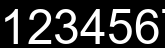

In [221]:
width, height, tem = get_text_dim(f"1234567",file, 36)
Image.open(tem)

In [222]:
pix_width = fonts.pts2pix(width)
pix_height = fonts.pts2pix(height)

In [227]:
im_height = height

In [223]:
im_width = pix_width

In [224]:
im_width = width

In [232]:
im_width

160

(3, 7, 135, 32)


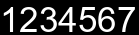

In [253]:
tem = io.BytesIO()
im = Image.new("RGB", (box[2]-box[0]+10, im_height), (0,0,0))
draw = ImageDraw.Draw(im)
font_PIL = ImageFont.truetype(file, im_height)
draw.text((0,0), "1234567", font=font_PIL, fill=(255,255,255))
im.save(tem, format="png")
image = Image.open(tem)
print(image.getbbox())
image

In [254]:
box = image.getbbox()
print((box[2]-box[0]), im_width)
print((box[3]-box[1]), im_height)

132 160
25 35


In [249]:
box[2]-box[0]

129

In [246]:
25/35

0.7142857142857143

206
48


In [218]:
pix_width

213

In [94]:
20*0.75

15.0

In [95]:
13/0.75

17.333333333333332

In [76]:
fonts.pix2pts(48)

36